In [1]:
pima_indians_diabetes

NameError: name 'pima_indians_diabetes' is not defined

In [2]:
# KNN Classification
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
knn = 'pima_indians_diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(knn)
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [4]:
dataframe

,preg,plas,pres,skin,insu,mass,pedi,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [6]:
X   # values are tranformed between 0 to 1 , 

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [7]:
num_folds = 10
kf = KFold(n_splits=10)

In [8]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, X, Y, cv=kf)

In [9]:
results

array([0.72727273, 0.79220779, 0.68831169, 0.67532468, 0.77922078,
       0.76623377, 0.80519481, 0.83116883, 0.75      , 0.77631579])

In [10]:
print(results.mean())

0.759125085440875


In [11]:
# KNN Classification
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [12]:
filename = 'pima_indians_diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename)
array = dataframe.values

print(array)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [13]:
X = array[:, 0:8]
Y = array[:, 8]

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
n_nbrs=np.array([2*i+1 for i in range(0,10)])
print(n_nbrs)


[ 1  3  5  7  9 11 13 15 17 19]


In [16]:
p_g=dict(n_neighbors=n_nbrs)

In [17]:
p_g

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [18]:
n_nbrs

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [19]:
model = KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=p_g,cv=5)
grid.fit(X,Y)
#results=cross_val_score(model,X,Y,cv=kfold)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [20]:
print(grid.best_score_)
print(grid.best_params_)

0.7552584670231729
{'n_neighbors': 13}


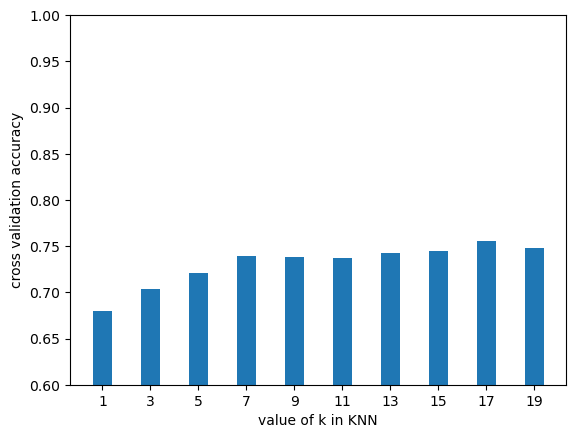

In [21]:
# search for an optimal value of K for KNN
import matplotlib.pyplot as plt
# range of k we want to try
#k_range = range(1, 20)
k_range=np.array([2*i+1 for i in range(0,10)])
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

plt.bar(k_range,k_scores)
plt.xlabel('value of k in KNN')
plt.ylabel('cross validation accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()
# k_scores=grid.best_score_
#pd.Series(k_scores).sort_values(ascending=False)

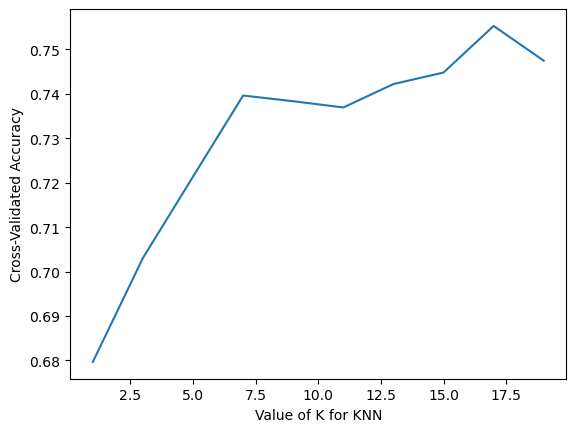

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
#k_range = range(1, 20)
k_range=np.array([2*i+1 for i in range(0,10)])

k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [25]:
Univ.iloc[:,1:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [26]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [27]:
wcss = [] # within-cluster sum of squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 34.79612750585774,
 27.04217148613099,
 22.452524599848374,
 18.777141507084394,
 15.727333194301238,
 13.15552614593657,
 10.729002092323686]

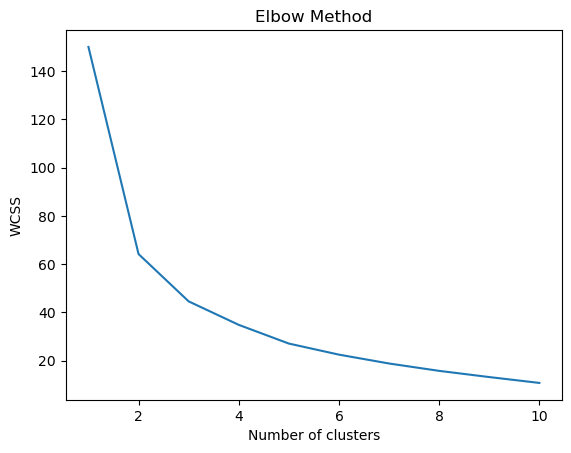

In [33]:
plt.plot(range(1, 11), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=42)

In [35]:
clusters_new.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [36]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [37]:
Univ['clusterid_new'] = clusters_new.labels_

In [38]:
Univ[Univ['clusterid_new']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [39]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [40]:
clusters_new.cluster_centers_

array([[-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454]])

In [63]:
Univ[Univ['clusterid_new']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
1,CalTech,1415,100,25,6,63575,81,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2
10,MIT,1380,94,30,10,34870,91,2
14,Princeton,1375,91,14,8,30220,95,2
16,Stanford,1360,90,20,12,36450,93,2
24,Yale,1375,95,19,11,43514,96,2


In [42]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
7,Georgetown,1255,74,24,12,20126,92,0
11,Northwestern,1260,85,39,11,28052,89,0
12,NotreDame,1255,81,42,13,15122,94,0
18,UCBerkeley,1240,95,40,17,15140,78,0
19,UChicago,1290,75,50,13,38380,87,0
20,UMichigan,1180,65,68,16,15470,85,0


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [56]:
mall = pd.read_csv("Mall_Customers.csv")

In [57]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [59]:
mall.drop(['CustomerID'],axis='columns',inplace=True)

In [60]:
mall=mall.replace("Male","1").replace("Female","0")

In [61]:
mall

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [66]:
mall['clusterid_new'] = clusters_new.labels_

ValueError: Length of values (25) does not match length of index (200)

In [67]:
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [68]:

Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [69]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [70]:
Univ.iloc[:,1:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [71]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [72]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


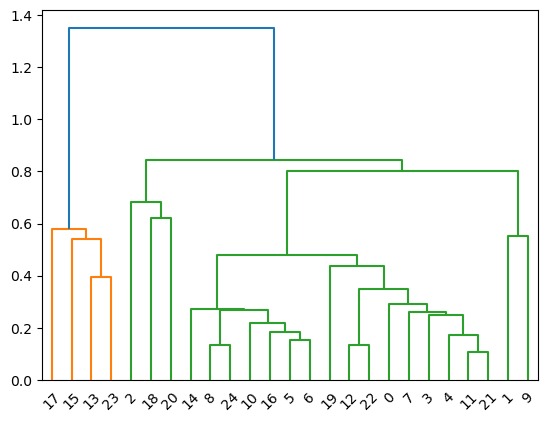

In [73]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [74]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [75]:
hc.fit(df_norm)
# hc.predict(df_norm)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [76]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [77]:
y_hc

array([3, 2, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 0, 3,
       3, 1, 3], dtype=int64)

In [78]:
Univ['h_clusterid'] = y_hc

In [79]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [80]:
Univ['h_clusterid'] = y_hc

In [81]:
Univ.groupby(["h_clusterid"])["Univ"]

In [82]:
Univ.groupby(["h_clusterid"])["Univ"].apply(lambda x:tuple(x))

h_clusterid
0                              (UCBerkeley, UMichigan)
1            (PennState, Purdue, TexasA&M, UWisconsin)
2                              (CalTech, JohnsHopkins)
3    (Brown, Columbia, Cornell, Dartmouth, Duke, Ge...
4                                               (CMU,)
Name: Univ, dtype: object

In [83]:

mall.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [84]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [85]:
mall.iloc[:,1:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [86]:
df_norm = norm_func(mall.iloc[:,1:])

In [87]:
df_norm 

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


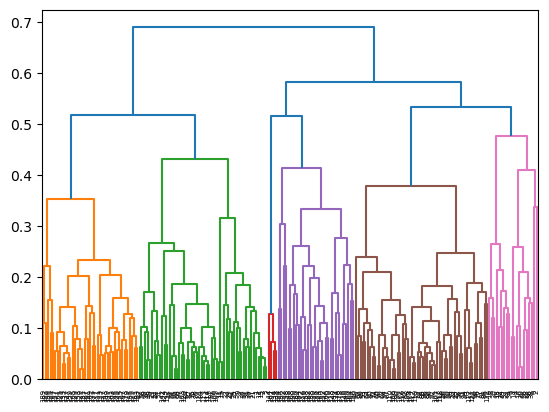

In [88]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [89]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [90]:
hc

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)